In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [75]:


df = pd.read_csv("clinical_features.csv")
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,label,recording_type,filename
0,183.108298,598.235997,75.097407,0.027638,0.000161,0.012225,0.013374,0.036675,0.112064,1.107255,...,13.299016,1.929814,0.409083,2.317827,11.407417,0.0,1.929814,0,ReadText,ID00_hc_0_0_0.wav
1,192.255098,599.137157,75.999512,0.016789,0.000089,0.007039,0.007289,0.021118,0.078831,0.738708,...,11.238335,1.836827,0.492887,-0.132406,12.346766,0.0,1.836827,0,ReadText,ID01_hc_0_0_0.wav
2,128.002954,575.758742,74.967779,0.026315,0.000214,0.010535,0.011561,0.031606,0.103053,0.988962,...,13.461842,1.709061,0.434742,2.848873,18.189618,0.0,1.709061,0,ReadText,ID03_hc_0_0_0.wav
3,187.069078,593.969524,75.668913,0.020992,0.000115,0.009187,0.008999,0.027562,0.080957,0.817689,...,12.257481,1.876719,0.371499,0.083857,9.573673,0.0,1.876719,0,ReadText,ID05_hc_0_0_0.wav
4,196.503242,597.873314,76.535299,0.014979,0.000077,0.005397,0.005852,0.016191,0.080786,0.819313,...,14.646375,2.219407,0.420236,0.058859,5.788663,0.0,2.219407,0,ReadText,ID08_hc_0_0_0.wav


In [76]:
df.describe() #summary of statistics

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,label
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.000000,73.000000
mean,170.306996,566.498381,77.522880,0.022452,0.000147,0.009626,0.010398,0.028878,0.091699,0.888960,...,0.104483,0.074169,13.774980,1.904526,0.294570,1.183207,12.844474,0.0,1.904526,0.424658
std,31.605765,55.709005,7.361061,0.005766,0.000069,0.002739,0.002958,0.008218,0.020646,0.170279,...,0.028939,0.011464,1.969796,0.390123,0.119803,1.771586,9.298995,0.0,0.390123,0.497712
min,100.820285,301.463752,74.935558,0.010944,0.000050,0.004290,0.004292,0.012870,0.054177,0.525784,...,0.058130,0.054018,8.230488,1.169299,0.086565,-2.025498,2.981959,0.0,1.169299,0.000000
25%,140.205140,570.848213,75.097407,0.018419,0.000095,0.007576,0.008330,0.022729,0.079002,0.776851,...,0.085932,0.066865,12.382696,1.550804,0.182846,-0.244366,6.546883,0.0,1.550804,0.000000
50%,180.694856,590.293785,75.448829,0.022119,0.000130,0.009780,0.010188,0.029341,0.089035,0.871736,...,0.101774,0.072330,13.825529,1.943109,0.299803,0.949297,9.293275,0.0,1.943109,0.000000
75%,192.955595,596.983235,76.385338,0.026117,0.000185,0.011310,0.012418,0.033930,0.103053,0.992034,...,0.120140,0.080758,14.955523,2.185085,0.387731,2.444128,16.910503,0.0,2.185085,1.000000
max,219.525438,599.901743,130.426445,0.039317,0.000400,0.016847,0.018764,0.050542,0.178908,1.512831,...,0.210512,0.121499,18.512208,2.616850,0.596235,4.779358,44.222256,0.0,2.616850,1.000000


In [77]:
#deleting column jitter_local and shimmer_local
df = df.drop(columns = ['recording_type','filename'])
df.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,label
0,183.108298,598.235997,75.097407,0.027638,0.000161,0.012225,0.013374,0.036675,0.112064,1.107255,...,0.134977,0.075194,13.299016,1.929814,0.409083,2.317827,11.407417,0.0,1.929814,0
1,192.255098,599.137157,75.999512,0.016789,0.000089,0.007039,0.007289,0.021118,0.078831,0.738708,...,0.087156,0.088981,11.238335,1.836827,0.492887,-0.132406,12.346766,0.0,1.836827,0
2,128.002954,575.758742,74.967779,0.026315,0.000214,0.010535,0.011561,0.031606,0.103053,0.988962,...,0.117505,0.074284,13.461842,1.709061,0.434742,2.848873,18.189618,0.0,1.709061,0
3,187.069078,593.969524,75.668913,0.020992,0.000115,0.009187,0.008999,0.027562,0.080957,0.817689,...,0.077461,0.081583,12.257481,1.876719,0.371499,0.083857,9.573673,0.0,1.876719,0
4,196.503242,597.873314,76.535299,0.014979,0.000077,0.005397,0.005852,0.016191,0.080786,0.819313,...,0.085932,0.068276,14.646375,2.219407,0.420236,0.058859,5.788663,0.0,2.219407,0


In [78]:
df.isnull().sum() #checking missing values

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
label               0
dtype: int64

In [79]:
df['label'].value_counts() #checking distribution of target variable

label
0    42
1    31
Name: count, dtype: int64

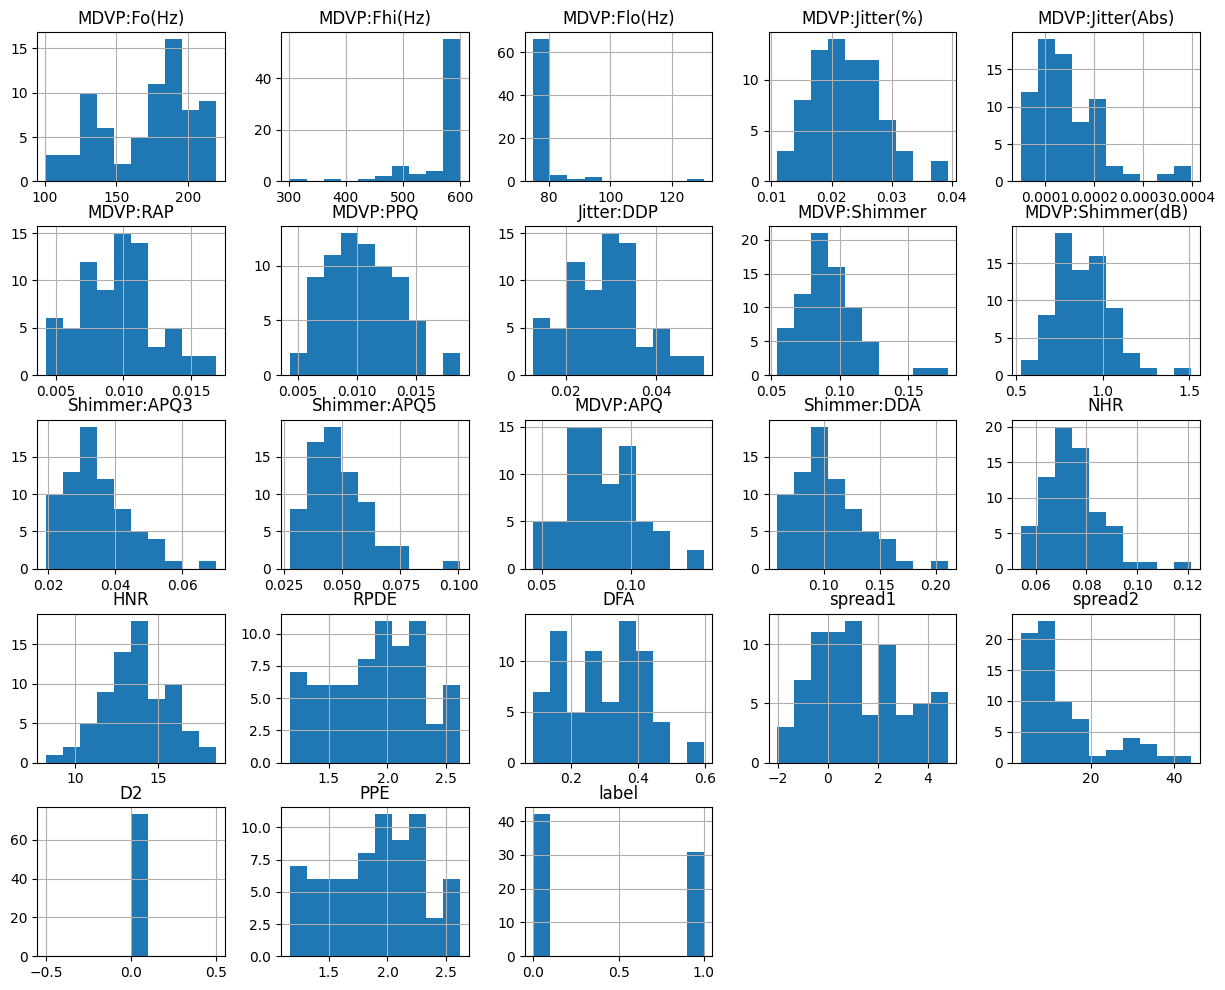

In [80]:
#Histogram of features
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.hist(figsize=(15,12));


<Axes: >

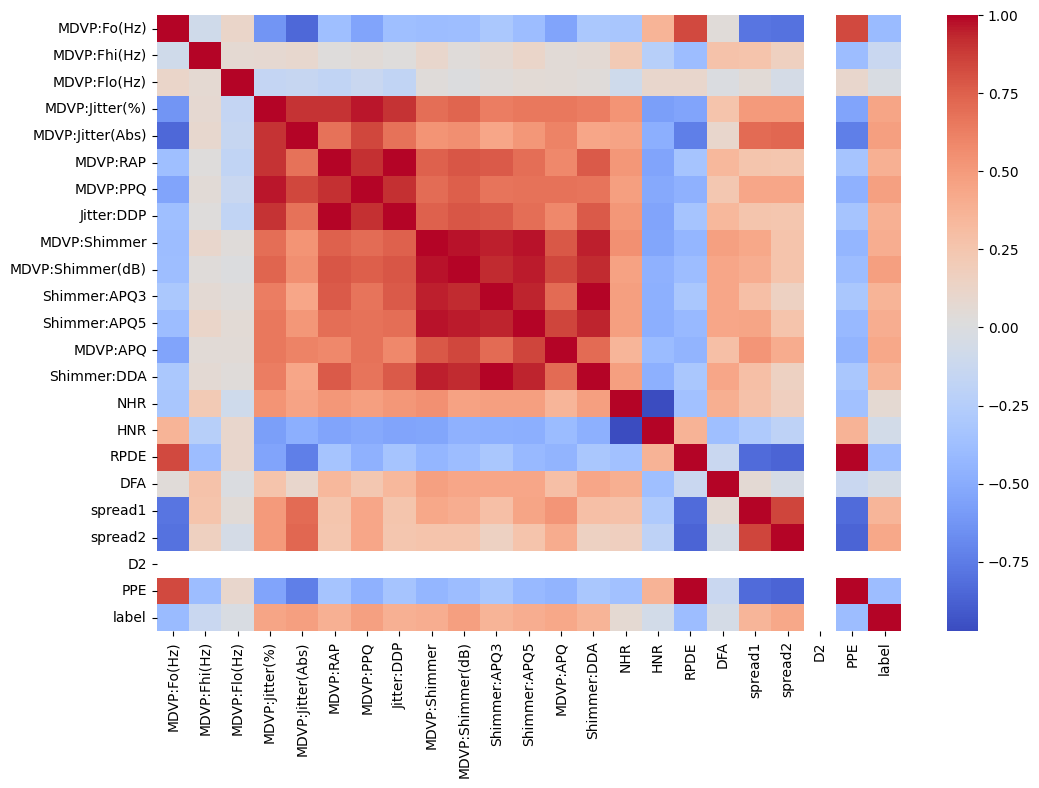

In [81]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), cmap="coolwarm", annot=False)



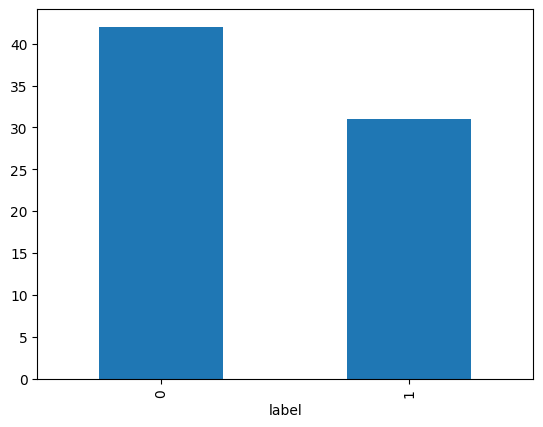

In [82]:
# Class distribution
df['label'].value_counts().plot(kind='bar');


In [83]:
#saving cleaned dataset
df2 = pd.read_csv("parkinsons.csv")
df2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [84]:
df2.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [85]:
df2.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [87]:
df2.rename(columns={'status':'label'}, inplace=True)

In [88]:
def move_label_last(df2, label_col="label"):
    cols = [c for c in df2.columns if c != label_col] + [label_col]
    return df2[cols]

df2 = move_label_last(df2)
df2.head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,label
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1


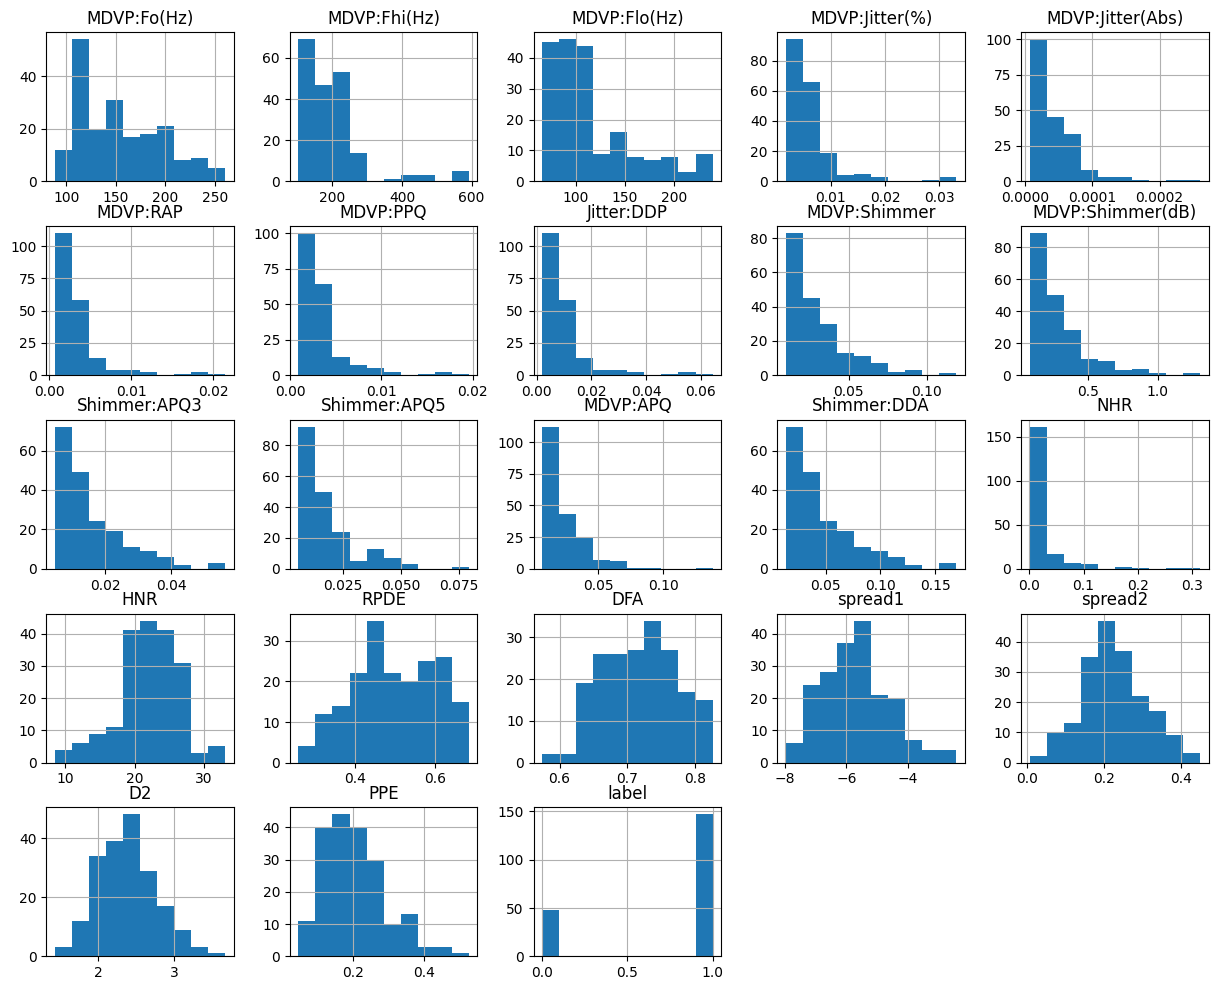

In [89]:
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])
numeric_df2.hist(figsize=(15,12));


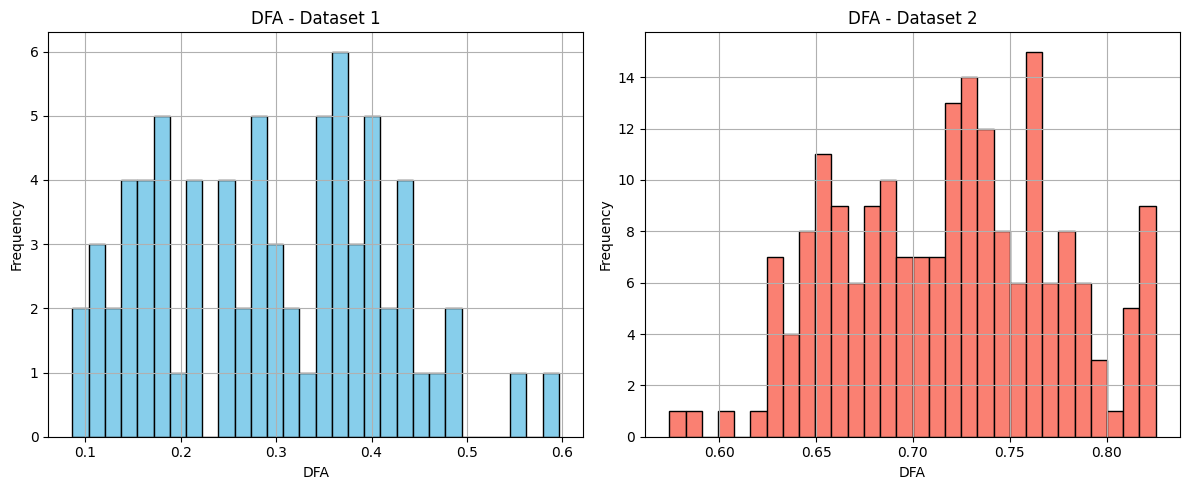

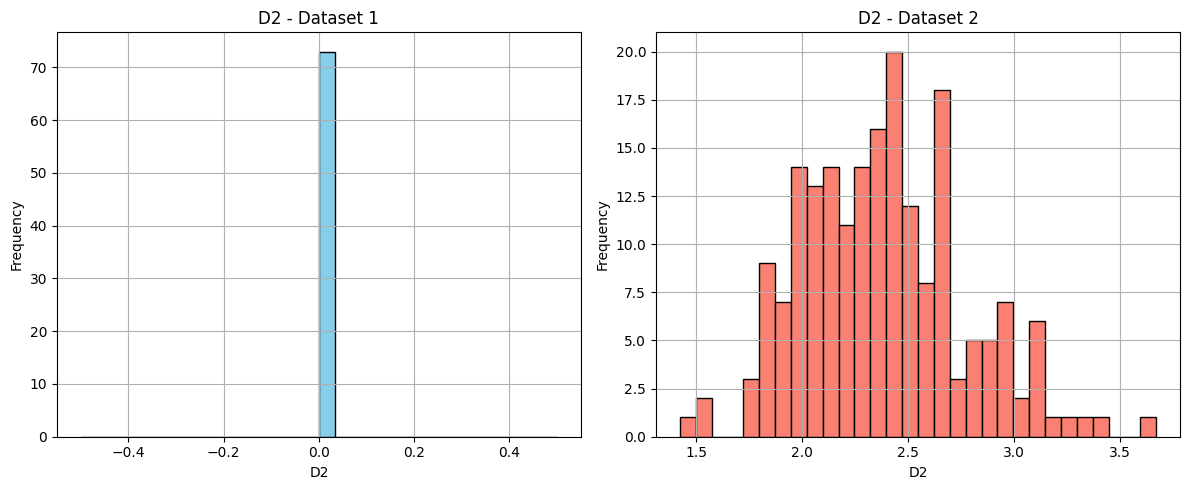

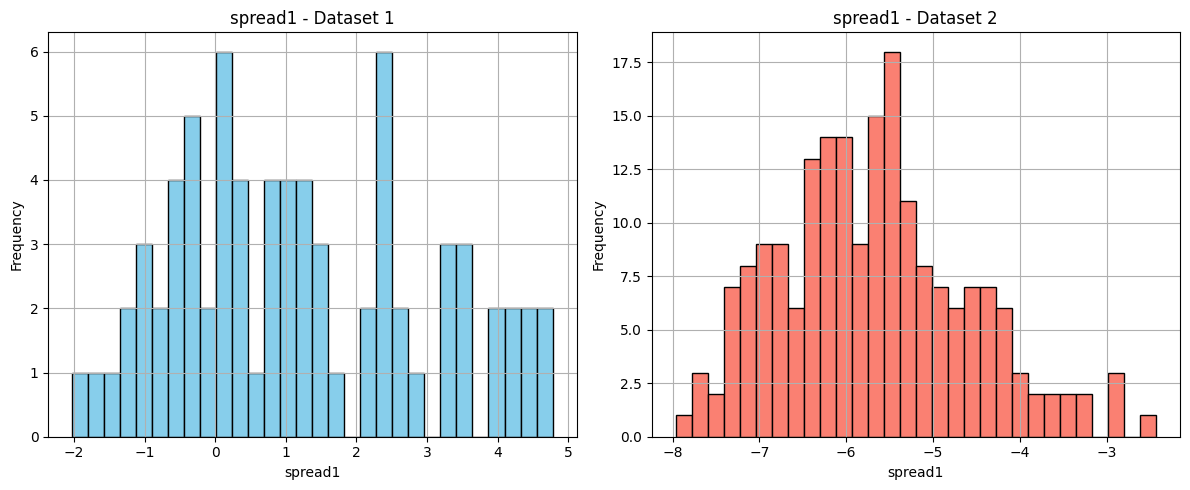

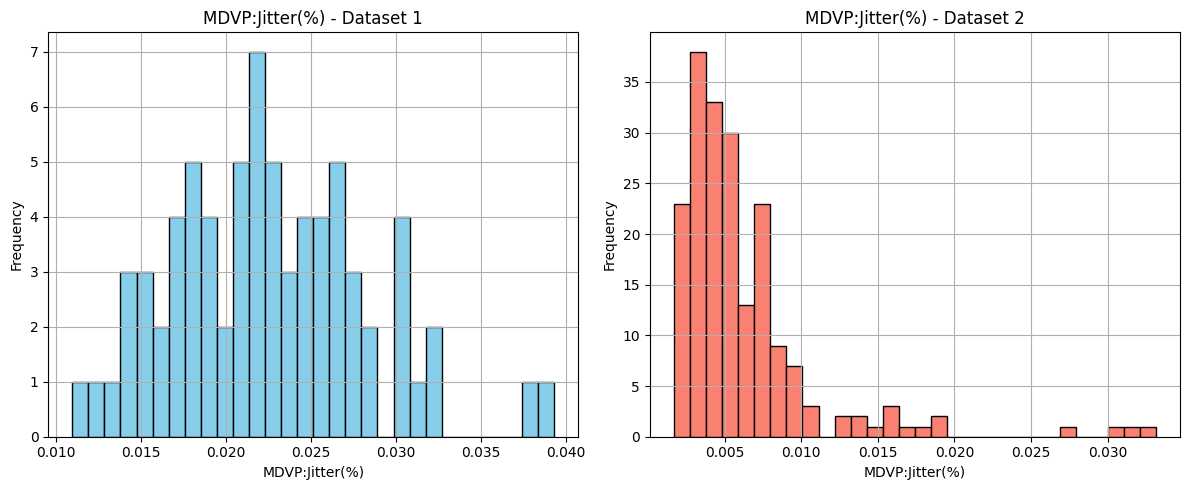

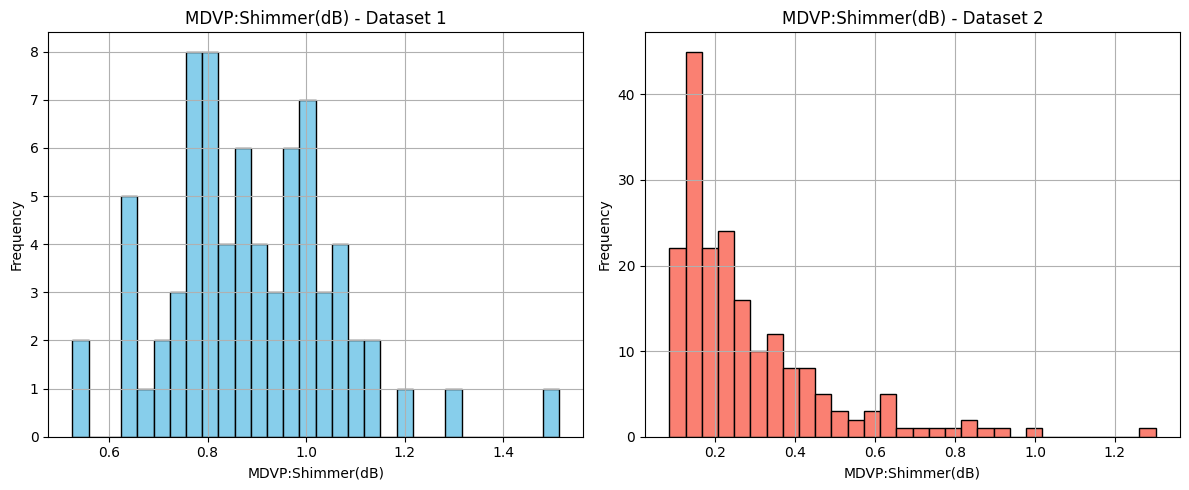

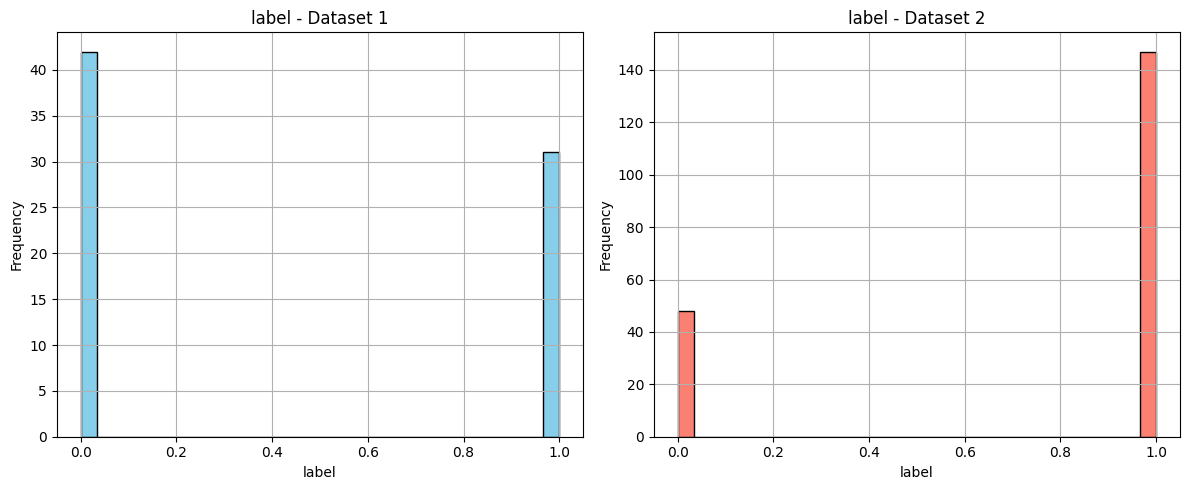

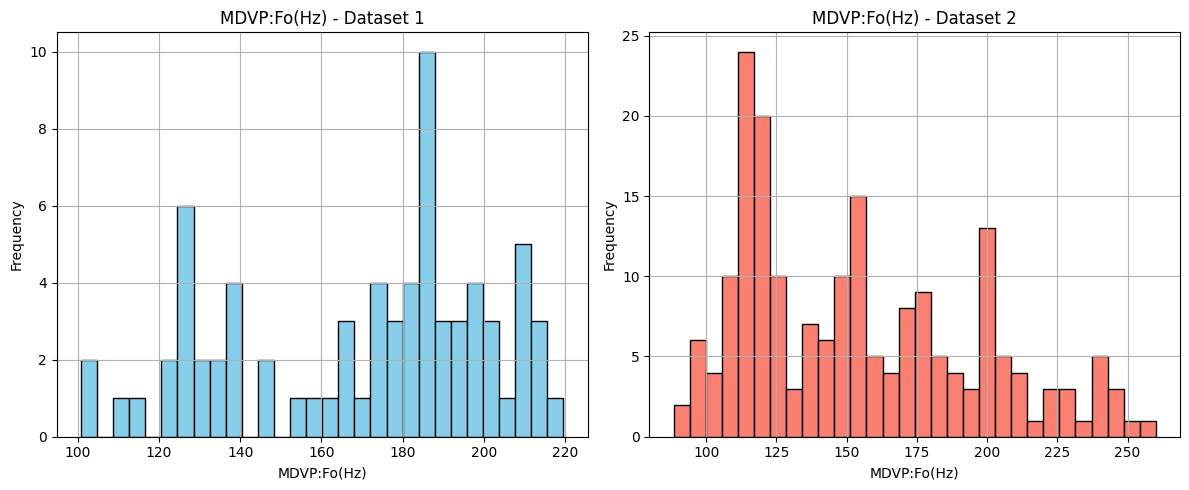

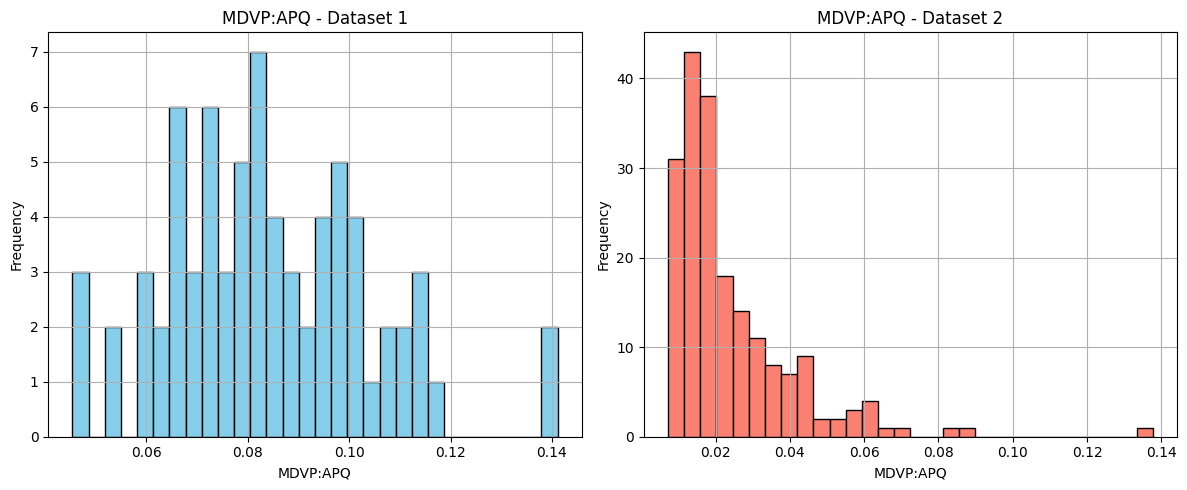

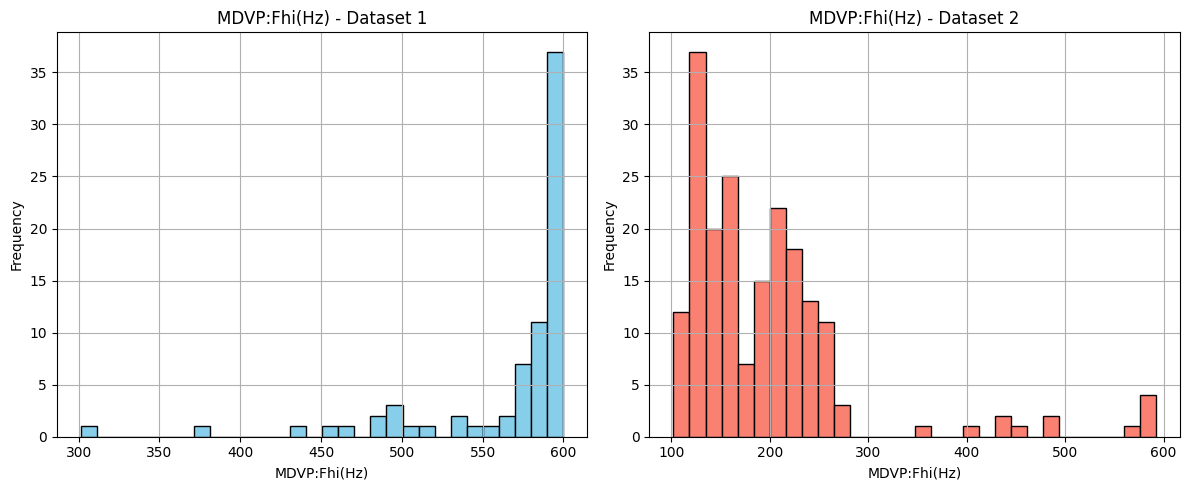

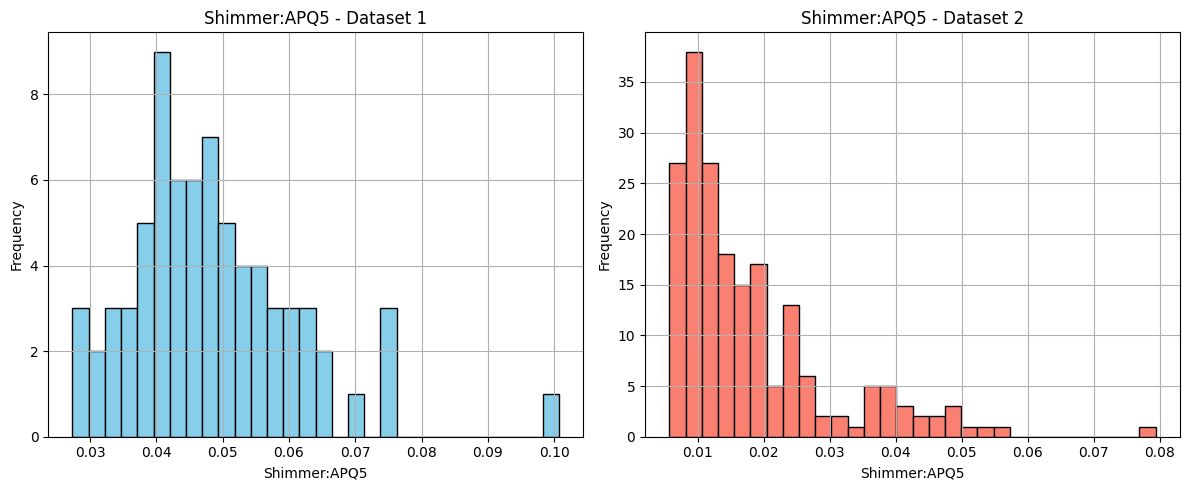

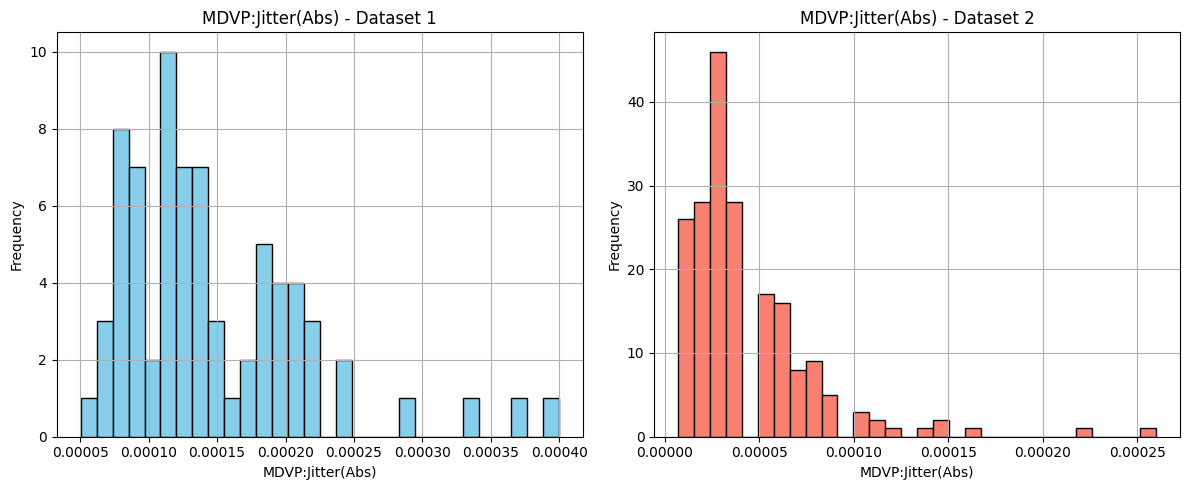

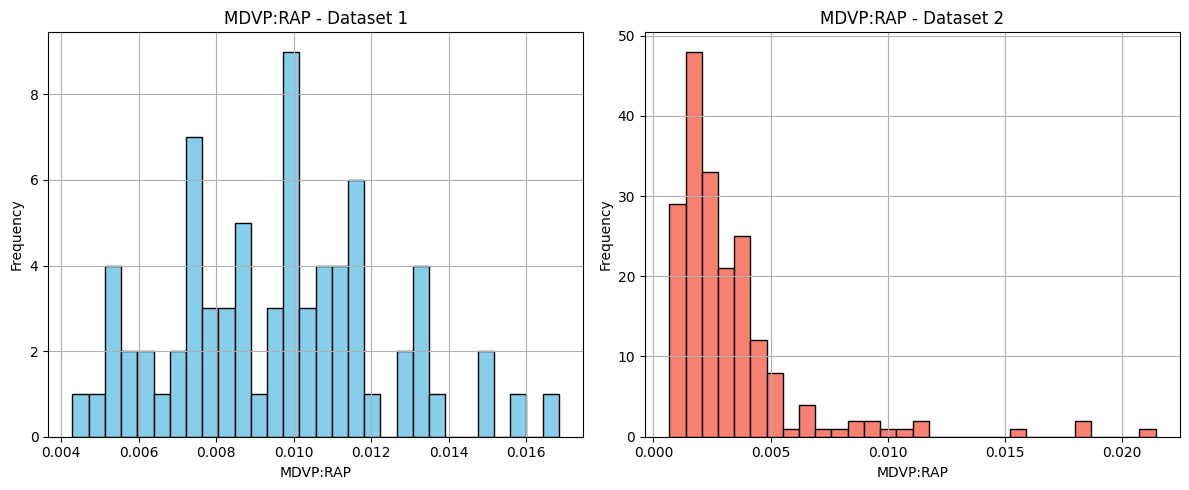

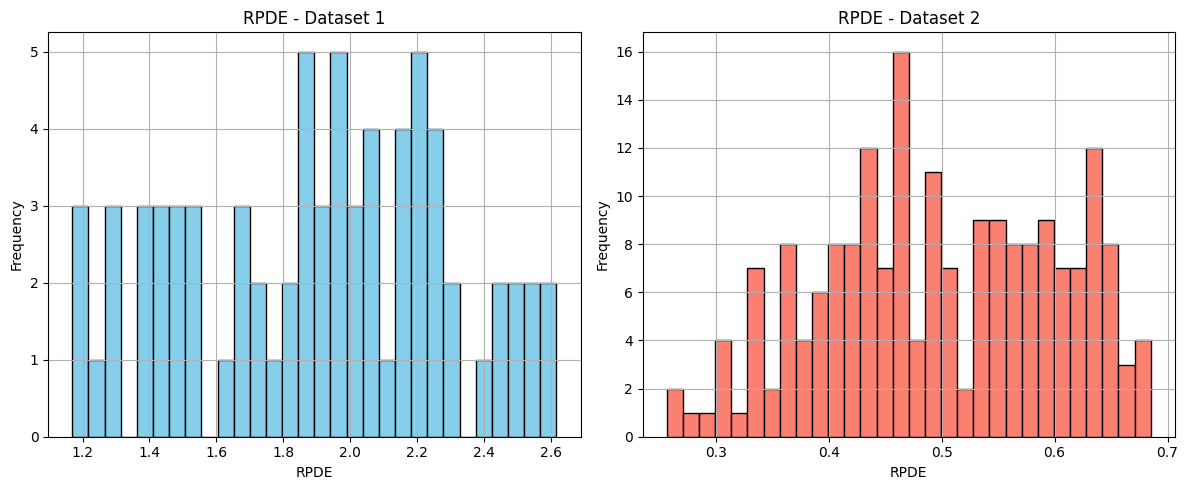

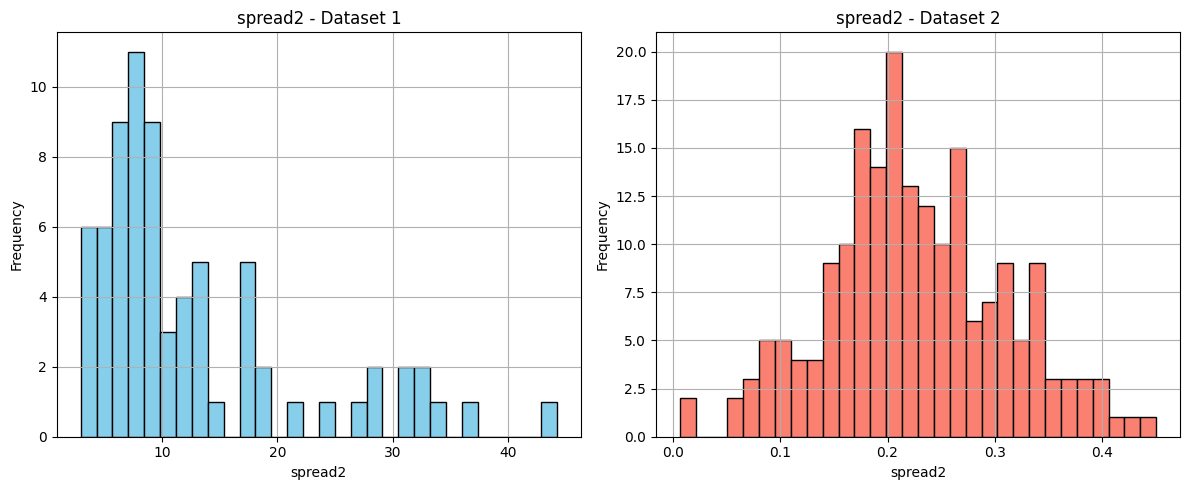

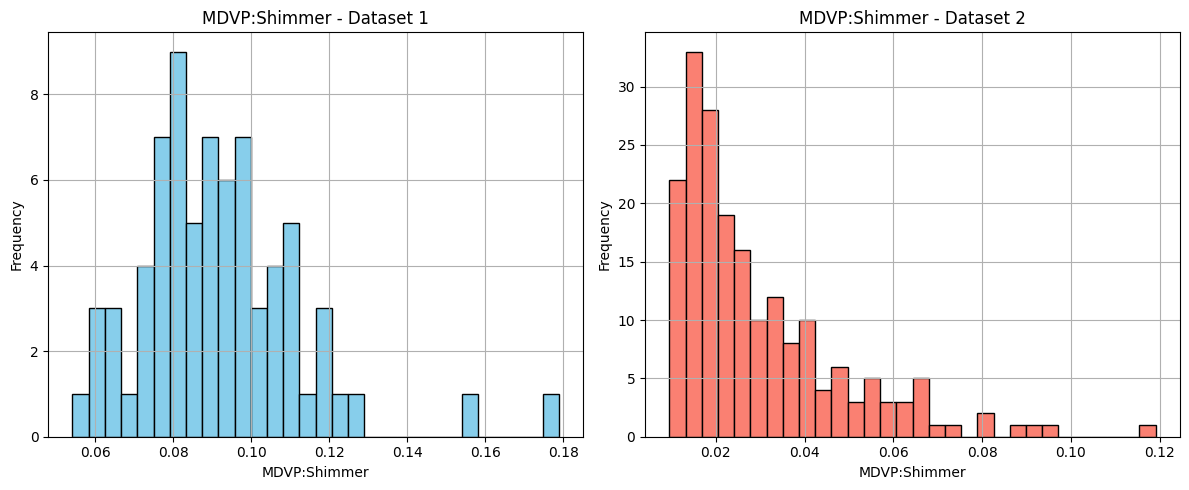

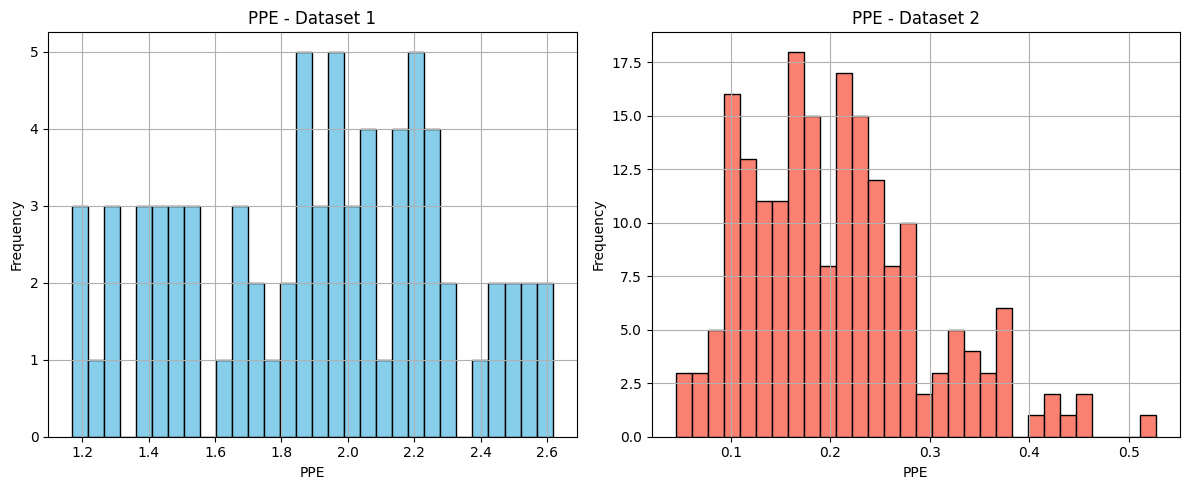

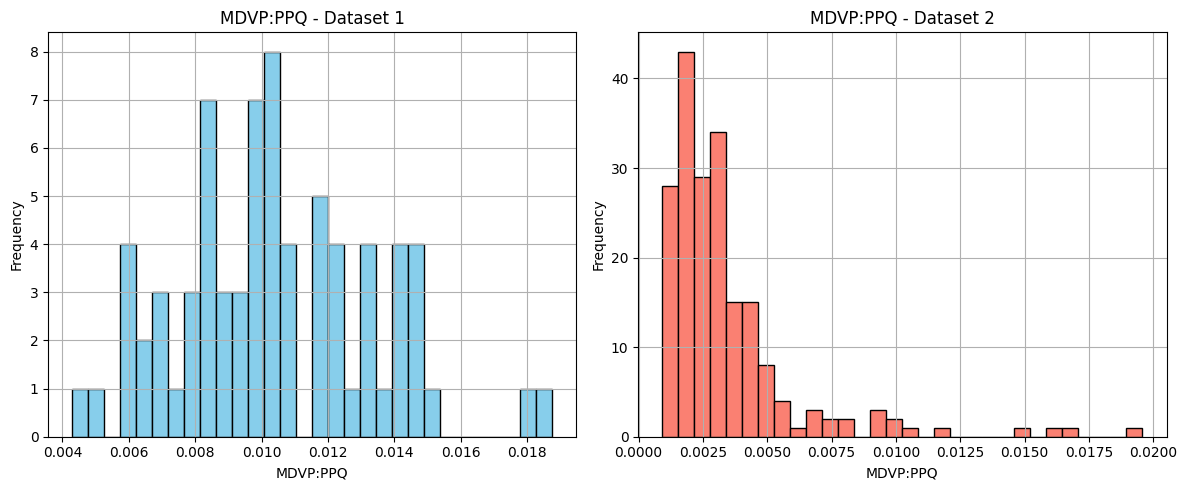

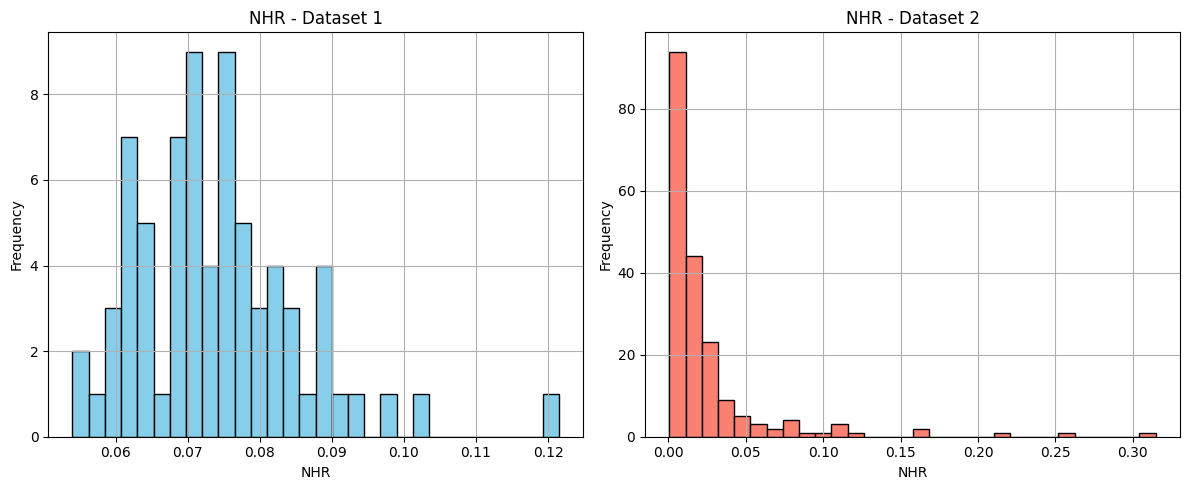

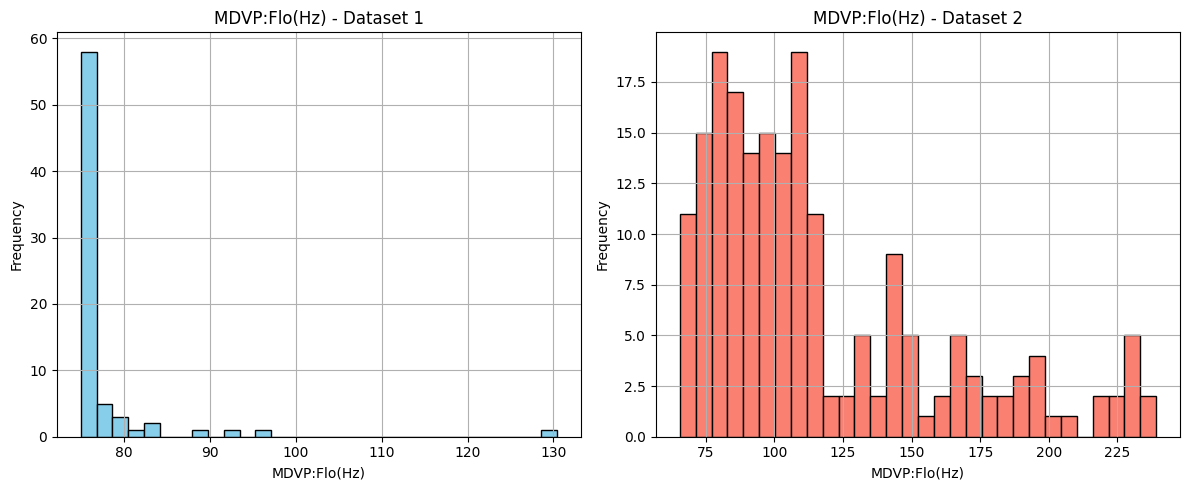

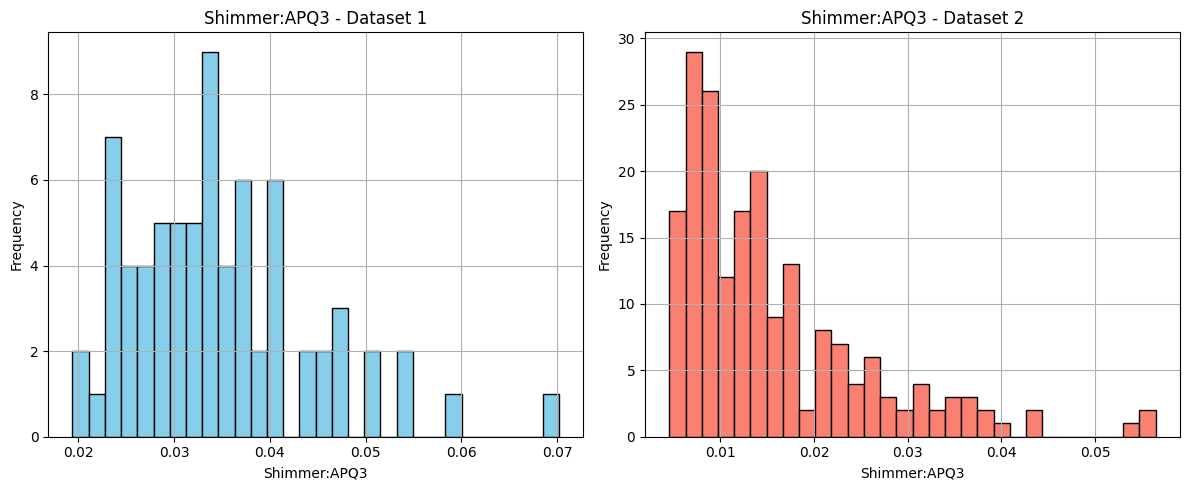

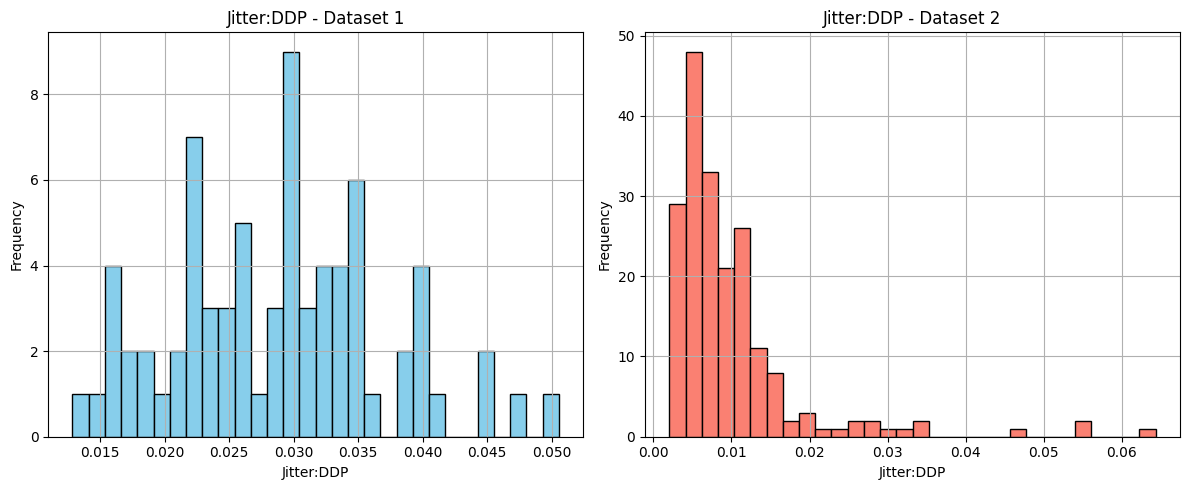

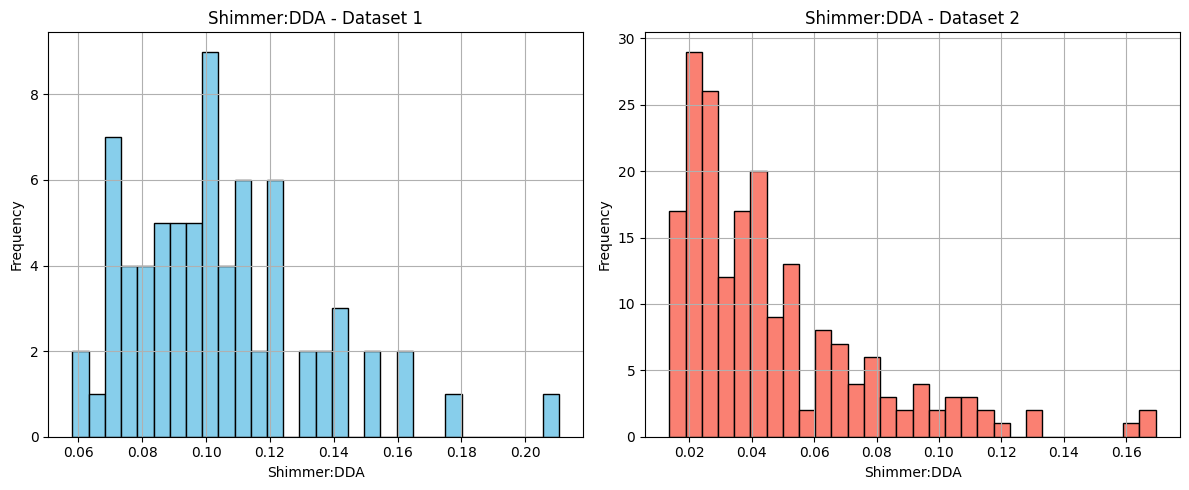

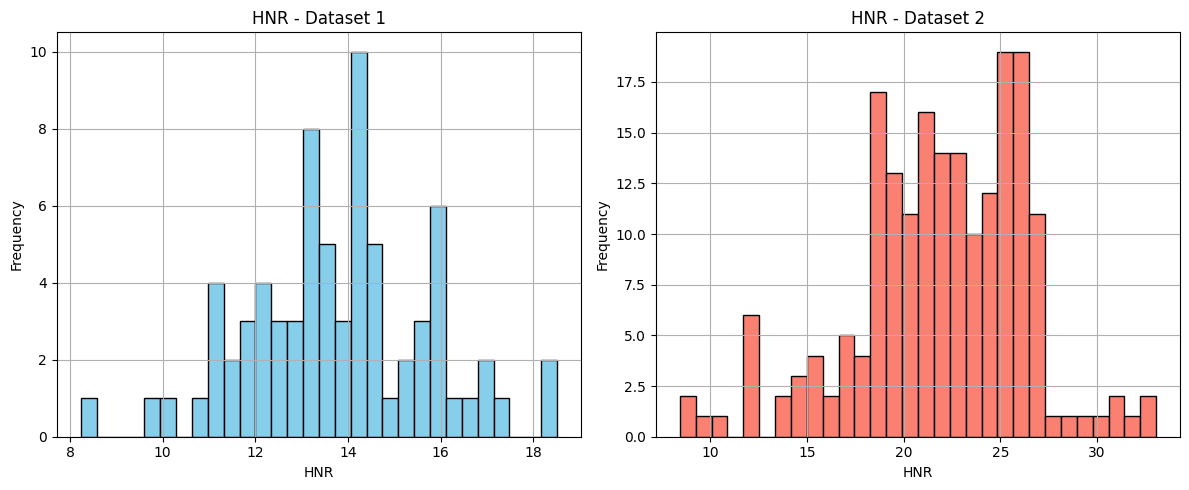

In [90]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])

# Ensure both datasets have the same columns
common_cols = list(set(numeric_df.columns).intersection(set(numeric_df2.columns)))

# Plot side-by-side histograms
for col in common_cols:
    plt.figure(figsize=(12,5))

    # Dataset 1
    plt.subplot(1,2,1)
    numeric_df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col} - Dataset 1")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Dataset 2
    plt.subplot(1,2,2)
    numeric_df2[col].hist(bins=30, color='salmon', edgecolor='black')
    plt.title(f"{col} - Dataset 2")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


In [91]:
df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,label
0,183.108298,598.235997,75.097407,0.027638,0.000161,0.012225,0.013374,0.036675,0.112064,1.107255,...,0.134977,0.075194,13.299016,1.929814,0.409083,2.317827,11.407417,0.0,1.929814,0
1,192.255098,599.137157,75.999512,0.016789,0.000089,0.007039,0.007289,0.021118,0.078831,0.738708,...,0.087156,0.088981,11.238335,1.836827,0.492887,-0.132406,12.346766,0.0,1.836827,0


In [93]:
df2 = df2.drop(columns = ['name'])
df2.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,label
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1


In [ ]:
merge_df = pd.concat([df, df2], axis=0)
merge_df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,label
0,183.108298,598.235997,75.097407,0.027638,0.000161,0.012225,0.013374,0.036675,0.112064,1.107255,...,0.134977,0.075194,13.299016,1.929814,0.409083,2.317827,11.407417,0.0,1.929814,0
1,192.255098,599.137157,75.999512,0.016789,0.000089,0.007039,0.007289,0.021118,0.078831,0.738708,...,0.087156,0.088981,11.238335,1.836827,0.492887,-0.132406,12.346766,0.0,1.836827,0


In [97]:
merge_df.shape
merge_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,label
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,158.608193,297.723287,105.755497,0.010642,0.000072,0.005028,0.005340,0.015084,0.046595,0.447512,...,0.062652,0.038282,19.676636,0.881511,0.602735,-3.813744,3.663493,1.733045,0.669060,0.664179
std,39.567055,184.564298,41.114120,0.008858,0.000065,0.004046,0.004184,0.012137,0.033731,0.329606,...,0.039465,0.041308,5.325969,0.664942,0.204401,3.330541,7.415943,1.111328,0.787716,0.473160
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.230488,0.256570,0.086565,-7.964984,0.006274,0.000000,0.044539,0.000000
25%,121.977250,148.782000,75.690147,0.004023,0.000030,0.001850,0.002077,0.005550,0.018302,0.167250,...,0.028435,0.007745,14.715844,0.448324,0.452088,-6.171600,0.192319,0.000000,0.160811,0.000000
50%,153.941500,211.782500,89.587000,0.006490,0.000050,0.003520,0.003430,0.010565,0.032535,0.307500,...,0.052545,0.019485,20.121500,0.566636,0.683945,-5.285960,0.262474,2.151602,0.234699,1.000000
75%,187.886810,506.083663,114.033250,0.017183,0.000091,0.007587,0.008215,0.022761,0.073160,0.761061,...,0.091290,0.069008,24.183250,1.289587,0.741585,-1.058241,4.300691,2.491449,1.289587,1.000000
max,260.105000,599.901743,239.170000,0.039317,0.000400,0.021440,0.019580,0.064330,0.178908,1.512831,...,0.210512,0.314820,33.047000,2.616850,0.825288,4.779358,44.222256,3.671155,2.616850,1.000000


In [99]:
merge_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,label
0,183.108298,598.235997,75.097407,0.027638,0.000161,0.012225,0.013374,0.036675,0.112064,1.107255,...,0.134977,0.075194,13.299016,1.929814,0.409083,2.317827,11.407417,0.0,1.929814,0
1,192.255098,599.137157,75.999512,0.016789,0.000089,0.007039,0.007289,0.021118,0.078831,0.738708,...,0.087156,0.088981,11.238335,1.836827,0.492887,-0.132406,12.346766,0.0,1.836827,0
2,128.002954,575.758742,74.967779,0.026315,0.000214,0.010535,0.011561,0.031606,0.103053,0.988962,...,0.117505,0.074284,13.461842,1.709061,0.434742,2.848873,18.189618,0.0,1.709061,0
3,187.069078,593.969524,75.668913,0.020992,0.000115,0.009187,0.008999,0.027562,0.080957,0.817689,...,0.077461,0.081583,12.257481,1.876719,0.371499,0.083857,9.573673,0.0,1.876719,0
4,196.503242,597.873314,76.535299,0.014979,0.000077,0.005397,0.005852,0.016191,0.080786,0.819313,...,0.085932,0.068276,14.646375,2.219407,0.420236,0.058859,5.788663,0.0,2.219407,0


In [100]:
#shuffling dataset
data = merge_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [101]:
data.to_csv("final_parkinsons_data.csv", index=False)